Load data and assign colours

In [1]:
import json
import os
from uncertainties import ufloat
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})
from functions import prettifySample

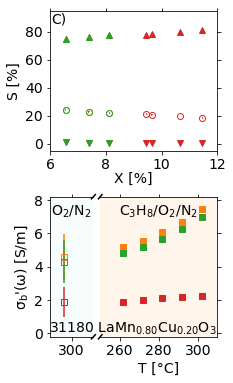

In [6]:
sid = "31180"
d = {}
for rep in ["01", "02", "03"]:
    d[rep] = json.load(open(os.path.join("..", "data", "ex_repro", sid, f"handbook_{rep}.json"), "r"))
    d[rep]["c"] = f"C{rep[1]}"


fig = plt.figure(figsize=(3,6))
grid = plt.GridSpec(100, 100, wspace=0.1, hspace=0.1, figure=fig)
ax = []

ax.append(plt.subplot(grid[:43, :]))
ax.append(plt.subplot(grid[57:, :26]))
ax.append(plt.subplot(grid[57:, 30:]))

for sample in d:
    X = []
    S = {"CO":[], "CO2":[], "propylene":[]}
    T = []
    dp = {"σ": [], "ε'b": [], 'ε"b': []}
    tstart = d[sample]["sections"][0]["t0"][0]
    for sec in d[sample]["sections"]:
        if sec["id"] in ["06","07","08","09"]:
            X.append(ufloat(*sec["Xp"]))
            S["CO"].append(ufloat(*sec["Sp"]["CO"]))
            S["CO2"].append(ufloat(*sec["Sp"]["CO2"]))
            S["propylene"].append(ufloat(*sec["Sp"]["propylene"]))
        if sec["id"] in ["02", "03", "04", "05", "06"]:
            T.append(ufloat(*sec["T"]))
            for key in dp:
                dp[key].append(ufloat(*sec[key]))
    ax[0].errorbar([i.n for i in X], [i.n for i in S["CO2"]],
                     xerr = [i.s for i in X], yerr = [i.s for i in S["CO2"]],
                     marker = "^", linestyle = "", color = d[sample]["c"])
    ax[0].errorbar([i.n for i in X], [i.n for i in S["CO"]],
                     xerr = [i.s for i in X], yerr = [i.s for i in S["CO"]],
                     marker = "v", linestyle = "", color = d[sample]["c"])
    ax[0].errorbar([i.n for i in X], [i.n for i in S["propylene"]],
                     xerr = [i.s for i in X], yerr = [i.s for i in S["propylene"]],
                     marker = "o", linestyle = "", color = d[sample]["c"], fillstyle="none")
    ax[1].errorbar(d[sample]["sections"][0]["T"][0], d[sample]["results"]["σr"][0],
                   yerr = d[sample]["results"]["σr"][1], fillstyle="none",
                   marker = "s", linestyle = "", color = d[sample]["c"])
    ax[2].errorbar([i.n for i in T], [i.n for i in dp["σ"]],
                     xerr = [i.s for i in T], yerr = [i.s for i in dp["σ"]],
                     marker = "s", linestyle = "", color = d[sample]["c"])
#    ax[2].errorbar([i.n for i in T], [i.n for i in dp['ε"b']],
#                     xerr = [i.s for i in T], yerr = [i.s for i in dp['ε"b']],
#                     marker = "o", linestyle = "", color = d[sample]["c"])
#    ax[2].errorbar([i.n for i in T], [i.n for i in dp["ε'b"]],
#                     xerr = [i.s for i in T], yerr = [i.s for i in dp["ε'b"]],
#                     marker = "o", linestyle = "", color = d[sample]["c"])
    
ax[0].tick_params(left=True, right=True, bottom=True, top=True,
                  labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax[1].tick_params(left=True, right=False, bottom=True, top=True,
                  labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax[2].tick_params(left=False, right=True, bottom=True, top=True,
                  labelleft=False, labelright=False, labeltop=False, labelbottom=True)


ax[0].set_xlim(left=6,right=12)
ax[0].set_ylim(bottom=-5, top=95)
ax[0].set_xlabel("X [%]")
ax[0].xaxis.set_label_coords(0.5,-0.15)
ax[0].set_ylabel("S [%]")

ax[1].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
br = 0.015
wr = 3
kwargs = dict(transform=ax[1].transAxes, color='k', clip_on=False)
#ax[1].plot((1-br,1+br), (-br,+br), **kwargs)
#ax[1].plot((1-br,1+br),(1-br,1+br), **kwargs)
ax[1].plot((1-br*wr,1+br*wr), (1-br,1+br), **kwargs)
ax[1].plot((1-br*wr,1+br*wr), (-br,+br), **kwargs)
kwargs.update(transform=ax[2].transAxes)  # switch to the bottom axes
ax[2].plot((-br,+br), (1-br,1+br), **kwargs)
ax[2].plot((-br,+br), (-br,+br), **kwargs)

for a in ax[1:3]:
    a.set_ylim(bottom=-0.2, top=8.2)
ax[1].set_xlim(left=289, right=311)
ax[1].set_xticks([300])
ax[2].set_xlim(left=250, right=310)
ax[2].set_xticks([260,280,300])
ax[2].set_xlabel("T [°C]")
ax[1].set_ylabel("σ$_\mathrm{b}$'(ω) [S/m]")

ax[2].text(0.5,0.95,"O$_2$/N$_2$", transform=ax[1].transAxes, ha="center", va="top")
ax[2].text(0.5,0.95,"C$_3$H$_8$/O$_2$/N$_2$", transform=ax[2].transAxes, ha="center", va="top")

ax[1].set_facecolor("#f7fcfd")
ax[2].set_facecolor("#fff5eb")

ax[0].text(0.01, 0.99, "C)", transform=ax[0].transAxes, ha="left", va="top")
ax[2].text(0.99, 0, f'{sid} {prettifySample(d["01"]["metadata"]["sample"])}', transform=ax[2].transAxes, ha="right", va="bottom")

fig.savefig(os.path.join("..","outputs","repro_c.pdf"), dpi=300, format="pdf", pad_inches=0.1, bbox_inches="tight")
plt.show()

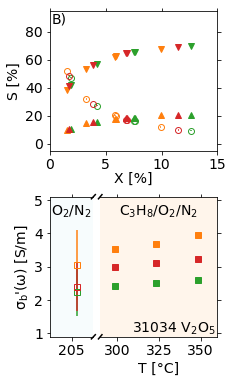

In [3]:
sid = "31034"
d = {}
for rep in ["01","02", "03"]:
    d[rep] = json.load(open(os.path.join("..", "data", "ex_repro", sid, f"old_{rep}.json"), "r"))
    d[rep]["c"] = f"C{rep[1]}"


fig = plt.figure(figsize=(3,6))
grid = plt.GridSpec(100, 100, wspace=0.1, hspace=0.1, figure=fig)
ax = []

ax.append(plt.subplot(grid[:43, :]))
ax.append(plt.subplot(grid[57:, :26]))
ax.append(plt.subplot(grid[57:, 30:]))

for sample in d:
    X = []
    S = {"CO":[], "CO2":[], "propylene":[]}
    T = []
    dp = {"σ": [], "ε'b": [], 'ε"b': []}
    tstart = d[sample]["sections"][0]["uts0"]
    for sec in d[sample]["sections"]:
        if sec["id"] in ["03","04","05", "06", "07"]:
            X.append(ufloat(*sec["Xp"]))
            S["CO"].append(ufloat(*sec["Sp"]["CO"]))
            S["CO2"].append(ufloat(*sec["Sp"]["CO2"]))
            S["propylene"].append(ufloat(*sec["Sp"]["propylene"]))
        if sec["id"] in ["07", "08", "09"]:
            T.append(ufloat(*sec["T"]))
            for key in dp:
                dp[key].append(ufloat(*sec[key]))
    ax[0].errorbar([i.n for i in X], [i.n for i in S["CO2"]],
                     xerr = [i.s for i in X], yerr = [i.s for i in S["CO2"]],
                     marker = "^", linestyle = "", color = d[sample]["c"])
    ax[0].errorbar([i.n for i in X], [i.n for i in S["CO"]],
                     xerr = [i.s for i in X], yerr = [i.s for i in S["CO"]],
                     marker = "v", linestyle = "", color = d[sample]["c"])
    ax[0].errorbar([i.n for i in X], [i.n for i in S["propylene"]],
                     xerr = [i.s for i in X], yerr = [i.s for i in S["propylene"]],
                     marker = "o", linestyle = "", color = d[sample]["c"], fillstyle="none")
    ax[1].errorbar(d[sample]["sections"][0]["T"][0], d[sample]["results"]["σr"][0],
                   yerr = d[sample]["results"]["σr"][1], fillstyle="none",
                   marker = "s", linestyle = "", color = d[sample]["c"])
    ax[2].errorbar([i.n for i in T], [i.n for i in dp["σ"]],
                     xerr = [i.s for i in T], yerr = [i.s for i in dp["σ"]],
                     marker = "s", linestyle = "", color = d[sample]["c"])
#    ax[2].errorbar([i.n for i in T], [i.n for i in dp['ε"b']],
#                     xerr = [i.s for i in T], yerr = [i.s for i in dp['ε"b']],
#                     marker = "o", linestyle = "", color = d[sample]["c"])
#    ax[2].errorbar([i.n for i in T], [i.n for i in dp["ε'b"]],
#                     xerr = [i.s for i in T], yerr = [i.s for i in dp["ε'b"]],
#                     marker = "o", linestyle = "", color = d[sample]["c"])
    
ax[0].tick_params(left=True, right=True, bottom=True, top=True,
                  labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax[1].tick_params(left=True, right=False, bottom=True, top=True,
                  labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax[2].tick_params(left=False, right=True, bottom=True, top=True,
                  labelleft=False, labelright=False, labeltop=False, labelbottom=True)


ax[0].set_xlim(left=0,right=15)
ax[0].set_ylim(bottom=-5, top=95)
ax[0].set_xlabel("X [%]")
ax[0].xaxis.set_label_coords(0.5,-0.15)
ax[0].set_ylabel("S [%]")

ax[1].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
br = 0.015
wr = 3
kwargs = dict(transform=ax[1].transAxes, color='k', clip_on=False)
#ax[1].plot((1-br,1+br), (-br,+br), **kwargs)
#ax[1].plot((1-br,1+br),(1-br,1+br), **kwargs)
ax[1].plot((1-br*wr,1+br*wr), (1-br,1+br), **kwargs)
ax[1].plot((1-br*wr,1+br*wr), (-br,+br), **kwargs)
kwargs.update(transform=ax[2].transAxes)  # switch to the bottom axes
ax[2].plot((-br,+br), (1-br,1+br), **kwargs)
ax[2].plot((-br,+br), (-br,+br), **kwargs)

for a in ax[1:3]:
    a.set_ylim(bottom=0.9, top=5.1)
ax[1].set_xlim(left=199, right=211)
ax[1].set_xticks([205])
ax[2].set_xlim(left=290, right=360)
ax[2].set_xticks([300,325,350])
ax[2].set_xlabel("T [°C]")
ax[1].set_ylabel("σ$_\mathrm{b}$'(ω) [S/m]")

ax[2].text(0.5,0.95,"O$_2$/N$_2$", transform=ax[1].transAxes, ha="center", va="top")
ax[2].text(0.5,0.95,"C$_3$H$_8$/O$_2$/N$_2$", transform=ax[2].transAxes, ha="center", va="top")

ax[1].set_facecolor("#f7fcfd")
ax[2].set_facecolor("#fff5eb")

ax[0].text(0.01, 0.99, "B)", transform=ax[0].transAxes, ha="left", va="top")
ax[2].text(0.99, 0, f'{sid} {prettifySample(d["01"]["metadata"]["sample"])}', transform=ax[2].transAxes, ha="right", va="bottom")

fig.savefig(os.path.join("..","outputs","repro_b.pdf"), dpi=300, format="pdf", pad_inches=0.1, bbox_inches="tight")
plt.show()

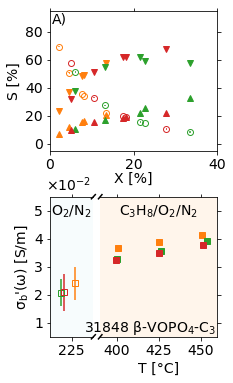

In [4]:
sid = "31848"
d = {}
for rep in ["01", "02", "03"]:
    d[rep] = json.load(open(os.path.join("..", "data", "ex_repro", sid, f"handbook_{rep}.json"), "r"))
    d[rep]["c"] = f"C{rep[1]}"


fig = plt.figure(figsize=(3,6))
grid = plt.GridSpec(100, 100, wspace=0.1, hspace=0.1, figure=fig)
ax = []

ax.append(plt.subplot(grid[:43, :]))
ax.append(plt.subplot(grid[57:, :26]))
ax.append(plt.subplot(grid[57:, 30:]))

for sample in d:
    X = []
    S = {"CO":[], "CO2":[], "propylene":[]}
    T = []
    dp = {"σ": [], "ε'b": [], 'ε"b': []}
    tstart = d[sample]["sections"][0]["t0"][0]
    for sec in d[sample]["sections"]:
        if sec["id"] in ["02","03","04", "05", "06"]:
            X.append(ufloat(*sec["Xp"]))
            S["CO"].append(ufloat(*sec["Sp"]["CO"]))
            S["CO2"].append(ufloat(*sec["Sp"]["CO2"]))
            S["propylene"].append(ufloat(*sec["Sp"]["propylene"]))
        if sec["id"] in ["06", "07", "08"]:
            T.append(ufloat(*sec["T"]))
            for key in dp:
                dp[key].append(ufloat(*sec[key]))
    ax[0].errorbar([i.n for i in X], [i.n for i in S["CO2"]],
                     xerr = [i.s for i in X], yerr = [i.s for i in S["CO2"]],
                     marker = "^", linestyle = "", color = d[sample]["c"])
    ax[0].errorbar([i.n for i in X], [i.n for i in S["CO"]],
                     xerr = [i.s for i in X], yerr = [i.s for i in S["CO"]],
                     marker = "v", linestyle = "", color = d[sample]["c"])
    ax[0].errorbar([i.n for i in X], [i.n for i in S["propylene"]],
                     xerr = [i.s for i in X], yerr = [i.s for i in S["propylene"]],
                     marker = "o", linestyle = "", color = d[sample]["c"], fillstyle="none")
    ax[1].errorbar(d[sample]["sections"][0]["T"][0], d[sample]["results"]["σr"][0]*100,
                   yerr = d[sample]["results"]["σr"][1]*100, fillstyle="none",
                   marker = "s", linestyle = "", color = d[sample]["c"])
    ax[2].errorbar([i.n for i in T], [i.n*100 for i in dp["σ"]],
                     xerr = [i.s for i in T], yerr = [i.s*100 for i in dp["σ"]],
                     marker = "s", linestyle = "", color = d[sample]["c"])
    
ax[0].tick_params(left=True, right=True, bottom=True, top=True,
                  labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax[1].tick_params(left=True, right=False, bottom=True, top=True,
                  labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax[2].tick_params(left=False, right=True, bottom=True, top=True,
                  labelleft=False, labelright=False, labeltop=False, labelbottom=True)


ax[0].set_xlim(left=0,right=40)
ax[0].set_ylim(bottom=-5, top=95)
ax[0].set_xlabel("X [%]")
ax[0].xaxis.set_label_coords(0.5,-0.15)
ax[0].set_ylabel("S [%]")

ax[1].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
br = 0.015
wr = 3
kwargs = dict(transform=ax[1].transAxes, color='k', clip_on=False)
#ax[1].plot((1-br,1+br), (-br,+br), **kwargs)
#ax[1].plot((1-br,1+br),(1-br,1+br), **kwargs)
ax[1].plot((1-br*wr,1+br*wr), (1-br,1+br), **kwargs)
ax[1].plot((1-br*wr,1+br*wr), (-br,+br), **kwargs)
kwargs.update(transform=ax[2].transAxes)  # switch to the bottom axes
ax[2].plot((-br,+br), (1-br,1+br), **kwargs)
ax[2].plot((-br,+br), (-br,+br), **kwargs)

for a in ax[1:3]:
    a.set_ylim(bottom=0.5, top=5.5)
ax[1].set_xlim(left=219, right=231)
ax[1].set_xticks([225])
ax[2].set_xlim(left=390, right=460)
ax[2].set_xticks([400,425,450])
ax[2].set_xlabel("T [°C]")
ax[1].set_ylabel("σ$_\mathrm{b}$'(ω) [S/m]")

ax[2].text(0.5,0.95,"O$_2$/N$_2$", transform=ax[1].transAxes, ha="center", va="top")
ax[2].text(0.5,0.95,"C$_3$H$_8$/O$_2$/N$_2$", transform=ax[2].transAxes, ha="center", va="top")

ax[1].set_facecolor("#f7fcfd")
ax[2].set_facecolor("#fff5eb")

ax[0].text(0.01, 0.99, "A)", transform=ax[0].transAxes, ha="left", va="top")
ax[1].text(-0.1, 1.02, r"$\times10^{-2}$", transform=ax[1].transAxes, ha="left", va="bottom")
ax[2].text(0.99, 0, f'{sid} {prettifySample(d["01"]["metadata"]["sample"])}', transform=ax[2].transAxes, ha="right", va="bottom")

fig.savefig(os.path.join("..","outputs","repro_a.pdf"), dpi=300, format="pdf", pad_inches=0.1, bbox_inches="tight")
plt.show()